In [2]:
import qiskit
from qiskit.visualization import *

import numpy as np

import torch
import torch.nn.functional as F

## Quantum GAN implementation

In [3]:
def get_real_generator(theta):
    circuit = qiskit.QuantumCircuit(3)
    
    circuit.h(0)
    circuit.rz(theta, 0)
    circuit.barrier()
    
    return circuit

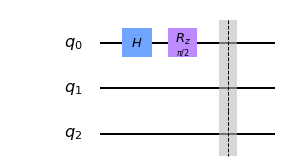

In [4]:
real_circuit = get_real_generator(np.pi / 2)
real_circuit.draw()

In [5]:
def get_fake_generator():
    n_qubits = 3

    all_qubits = [i for i in range(n_qubits)]
    all_params_keys = ['g_x_0', 'g_x_1', 'g_x_2', \
                       'g_y_0', 'g_y_1', 'g_y_2', \
                       'g_z_0', 'g_z_1', 'g_z_2']

    params = {}
    for param in all_params_keys:
       params[param] = qiskit.circuit.Parameter(param)

    circuit = qiskit.QuantumCircuit(n_qubits)
    circuit.h(0)

    circuit.rx(params['g_x_0'], 0)
    circuit.rx(params['g_x_1'], 1)
    circuit.ry(params['g_y_0'], 0)
    circuit.ry(params['g_y_1'], 1)
    circuit.rz(params['g_z_0'], 0)
    circuit.rz(params['g_z_1'], 1)
    
    circuit.cx(0, 1)

    circuit.rx(params['g_x_2'], 0)
    circuit.ry(params['g_y_2'], 0)
    circuit.rz(params['g_z_2'], 0)
    
    circuit.barrier()
    
    return circuit

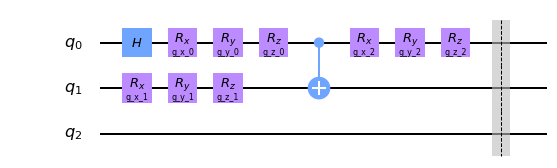

In [6]:
fake_circuit = get_fake_generator()
fake_circuit.draw()

In [7]:
def get_discriminator():
    n_qubits = 3

    all_qubits = [i for i in range(n_qubits)]
    all_params_keys = ['d_x_0', 'd_x_1', 'd_x_2', \
                       'd_y_0', 'd_y_1', 'd_y_2', \
                       'd_z_0', 'd_z_1', 'd_z_2']

    params = {}
    for param in all_params_keys:
       params[param] = qiskit.circuit.Parameter(param)

    circuit = qiskit.QuantumCircuit(n_qubits)
    
    circuit.h(0)

    circuit.rx(params['d_x_0'], 0)
    circuit.rx(params['d_x_1'], 2)
    circuit.ry(params['d_y_0'], 0)
    circuit.ry(params['d_y_1'], 2)
    circuit.rz(params['d_z_0'], 0)
    circuit.rz(params['d_z_1'], 2)

    circuit.cx(0, 2)

    circuit.rx(params['d_x_2'], 2)
    circuit.ry(params['d_y_2'], 2)
    circuit.rz(params['d_z_2'], 2)
    
    circuit.barrier()
    
    return circuit

In [8]:
discriptor = get_discriminator()

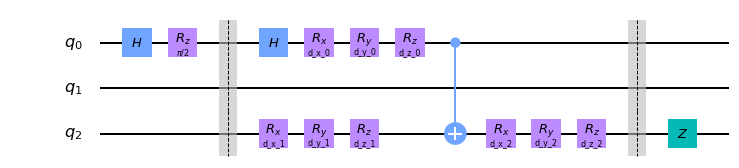

In [9]:
real_circuit = real_circuit.combine(discriptor)
real_circuit.z(2)
real_circuit.draw()

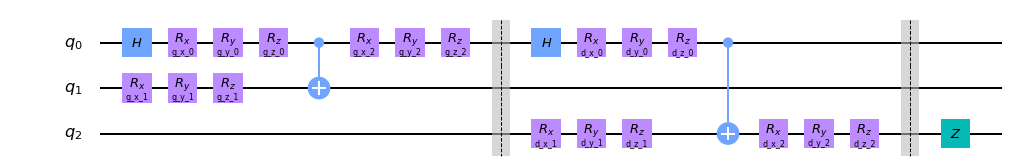

In [10]:
fake_circuit = fake_circuit.combine(discriptor)
fake_circuit.z(2)
fake_circuit.draw()

#### Literature:
1. https://pennylane.ai/qml/demos/tutorial_QGAN.html